# Methodes inverses et assimilation - Homework
#### Sara Arioli, M2 STPE, ACSC

In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt

from mcmc import mcmc
import densities
import my_problemLR

%matplotlib notebook


# Exercise 1

Run MCMC on the inverse problem and study the distribution of the solutions {a,b} around the maximum likelihood. Run the linear_regression_MCMC script after having defined your own logprior and loglikelyhood probability functions (my_problemLR
script). For the different kind of probability functions that you may have tried (gaussian, exponential, …) give the histograms, means, variance of the solution, and your estimation of the posterior density functions shape for a and b (is it Gaussian, exponential, lognormal, poisson,...)

In [2]:
# useful functions

def gauss(x,mean,sigma):
    y = 1/(sigma*np.sqrt(2*np.pi))*np.exp(-(x-mean)**2/(2*sigma**2))
    return y

def exp(x,mean,sigma):
    y = np.exp(-np.abs((x-mean)/sigma)) 
    return y

## Parameter for the problem

Text(0.5, 1.0, 'Observed data')

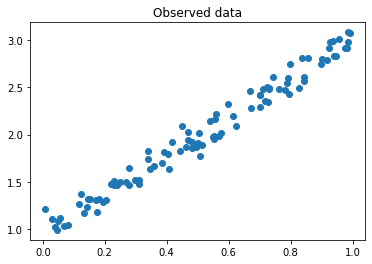

In [3]:
# parameters for the problem
Npoint = 100

# data abscissa {Xi}
my_problemLR.Xi = np.random.rand(Npoint)
my_problemLR.sigmad = 0.1 

# Linear regression coefficients to be found
slope = 2.
intercept = 1.

# Create 'observed' data
my_problemLR.Yi = slope * my_problemLR.Xi + intercept + np.random.randn(Npoint) * my_problemLR.sigmad

# Trial solution
X0 = np.array([10., 10.])

plt.figure()
plt.plot(my_problemLR.Xi,my_problemLR.Yi,'o')
plt.title('Observed data')

## Run MCMC

In [4]:
# set the step
step = np.array([0.01, 0.01])# *2 or *5 or *10

niter = 100000

# gaussian likelihood
gmout, gmMAP, gaccrate = mcmc(my_problemLR.logprior, my_problemLR.gauss_loglikelyhood,
                           densities.generate, densities.logproposal, X0, niter, step)
# exponential likelihood
emout, emMAP, eaccrate = mcmc(my_problemLR.logprior, my_problemLR.exp_loglikelyhood,
                           densities.generate, densities.logproposal, X0, niter, step)

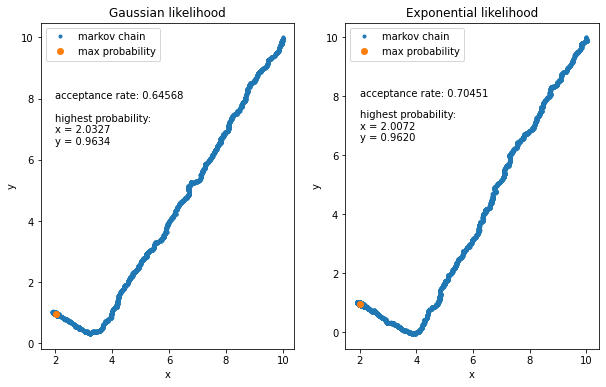

In [5]:
## Plot solutions

gx, gy = gmout[:,0], gmout[:,1]
ex, ey = emout[:,0], emout[:,1]

fig, ax = plt.subplots(1,2,figsize=(10,6))

# MCMC with gaussian likelihood
ax[0].plot(gx,gy,'.',label='markov chain')
ax[0].plot(gmMAP[0],gmMAP[1],'o',label='max probability')
ax[0].set_title('Gaussian likelihood')
ax[0].annotate('acceptance rate: '+str(gaccrate),(2,8))
ax[0].annotate('highest probability:\nx = '+str(gmMAP[0])[:6]+'\ny = '+str(gmMAP[1])[:6],(2,6.5))
ax[0].set_xlabel('x')
ax[0].set_ylabel('y')
ax[0].legend()

# MCMC with exponential likelihood
ax[1].plot(ex,ey,'.',label='markov chain')
ax[1].plot(emMAP[0],emMAP[1],'o',label='max probability')
ax[1].set_title('Exponential likelihood')
ax[1].annotate('acceptance rate: '+str(eaccrate),(2,8))
ax[1].annotate('highest probability:\nx = '+str(emMAP[0])[:6]+'\ny = '+str(emMAP[1])[:6],(2,6.5))
ax[1].set_xlabel('x')
ax[1].set_ylabel('y')
ax[1].legend()

#### Defining the burning period

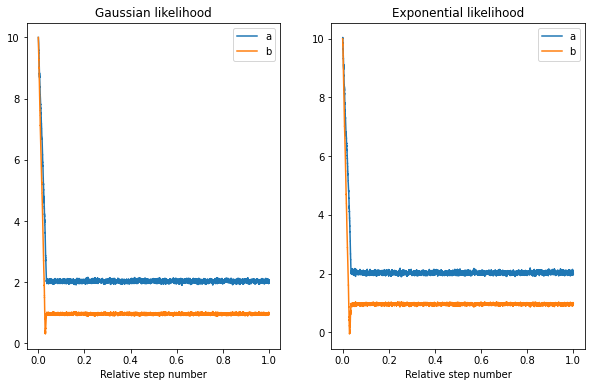

In [6]:
iter = np.arange(0.,niter)
fig, ax = plt.subplots(1,2,figsize=(10,6))

# Gaussian likelihood
ax[0].plot(iter/niter,gmout[:,0],label='a')
ax[0].plot(iter/niter,gmout[:,1],label='b')
ax[0].set_title('Gaussian likelihood')
ax[0].set_xlabel('Relative step number')
ax[0].legend()

# Exponential likelihood
ax[1].plot(iter/niter,emout[:,0],label='a')
ax[1].plot(iter/niter,emout[:,1],label='b')
ax[1].set_title('Exponential likelihood')
ax[1].set_xlabel('Relative step number')
ax[1].legend()

In both cases, the burning period is about the first 5% of measurements. The first 5% of data are therefore deleted from the chain.

In [7]:
burning_period = int(0.05*niter)

ga = gmout[burning_period:-1,0]
gb = gmout[burning_period:-1,1]

ea = emout[burning_period:-1,0]
eb = emout[burning_period:-1,1]

print('Length of Markov Chain after removing the burning period:',ga.shape)

Length of Markov Chain after removing the burning period: (94999,)


#### Defining approximately the correlation length

Text(0.5, 1.0, 'exponential likelihood')

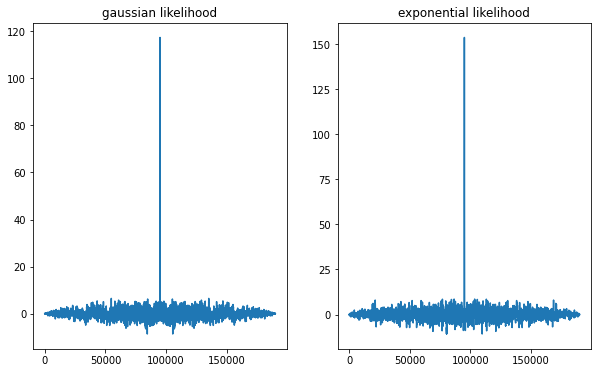

In [8]:
import scipy.signal as sig

fig,ax = plt.subplots(1,2,figsize=(10,6))

# gaussian likelihood
ax[0].plot(sig.correlate(ga-np.mean(ga),ga-np.mean(ga)))
ax[0].set_title('gaussian likelihood')

# exponential likelihood
ax[1].plot(sig.correlate(ea-np.mean(ea),ea-np.mean(ea)))
ax[1].set_title('exponential likelihood')

For the gaussian run, there is one peak every ~300/400 values, for the exponential run, there is one peak every ~400/500 values. Therefore I select one value every 500 values.

In [9]:
ga = ga[0:-1:500]
gb = gb[0:-1:500]

ea = ea[0:-1:500]
eb = eb[0:-1:500]

print('length of the "gaussian" MC: ', ga.shape,'\nlength of the "exponential" MC: ', ea.shape)

length of the "gaussian" MC:  (190,) 
length of the "exponential" MC:  (190,)


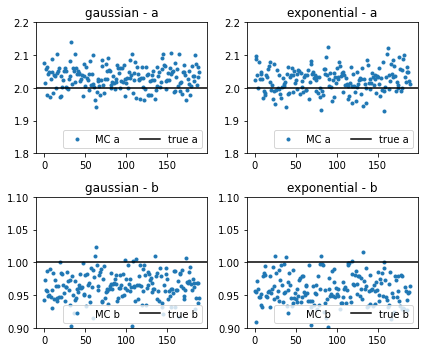

In [10]:
# plot resulting markov chain values

fig, ax = plt.subplots(2,2,figsize=(6,5))

ax[0,0].plot(ga,'.',label='MC a')
ax[0,0].set_title('gaussian - a')
ax[0,0].set_ylim(1.8,2.2)
ax[0,0].axhline(2,c='black',label='true a')
ax[0,0].legend(ncol=2,loc='lower right')

ax[0,1].plot(ea,'.',label='MC a')
ax[0,1].set_title('exponential - a')
ax[0,1].set_ylim(1.8,2.2)
ax[0,1].axhline(2,c='black',label='true a')
ax[0,1].legend(ncol=2,loc='lower right')

ax[1,0].plot(gb,'.',label='MC b')
ax[1,0].set_title('gaussian - b')
ax[1,0].set_ylim(0.9,1.1)
ax[1,0].axhline(1,c='black',label='true b')
ax[1,0].legend(ncol=2,loc='lower right')

ax[1,1].plot(eb,'.',label='MC b')
ax[1,1].set_title('exponential - b')
ax[1,1].set_ylim(0.9,1.1)
ax[1,1].axhline(1,c='black',label='true b')
ax[1,1].legend(ncol=2,loc='lower right')

fig.tight_layout()

## Represent histogram for slope and intercept

Highest probability solution with gaussian likelihood:    a =  2.032717056267014 ,  b =  0.9634521428568984 
Mean solution with gaussian likelihood: 
a =  2.0318 +- 0.0351 
b =  0.9640 +- 0.0206


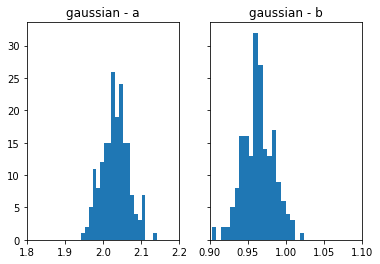

In [13]:
fig,ax = plt.subplots(1,2,figsize=(6,4),sharey=True)

x = np. arange(0.5,2.5,0.005)

ax[0].hist(ga,20)
ax[0].set_xlim(1.8,2.2)
ax[0].set_title('gaussian - a')

ax[1].hist(gb,20)
ax[1].set_xlim(0.9,1.1)
ax[1].set_title('gaussian - b')

print('Highest probability solution with gaussian likelihood:    a = ',gmMAP[0],',  b = ',gmMAP[1],
      '\nMean solution with gaussian likelihood:',
      '\na = ',str(np.mean(ga))[:6]+' +- '+str(np.std(ga))[:6],
      '\nb = ',str(np.mean(gb))[:6]+' +- '+str(np.std(gb))[:6])

Highest probability solution with exponential likelihood:    a =  2.0072823914705884 ,  b =  0.9620863099495004 
Mean solution with exponential likelihood: 
a =  2.0235 +- 0.0366 
b =  0.9584 +- 0.0226


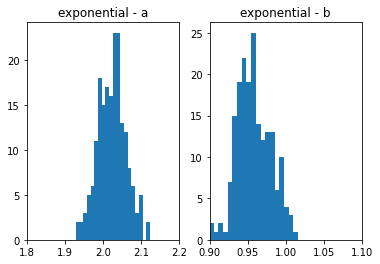

In [14]:
fig,ax = plt.subplots(1,2,figsize=(6,4))

x = np. arange(0.5,2.5,0.005)

ax[0].hist(ea,20)
ax[0].set_xlim(1.8,2.2)
ax[0].set_title('exponential - a')

ax[1].hist(eb,20)
ax[1].set_xlim(0.9,1.1)
ax[1].set_title('exponential - b')

print('Highest probability solution with exponential likelihood:    a = ',emMAP[0],',  b = ',emMAP[1],
      '\nMean solution with exponential likelihood:',
      '\na = ',str(np.mean(ea))[:6]+' +- '+str(np.std(ea))[:6],
      '\nb = ',str(np.mean(eb))[:6]+' +- '+str(np.std(eb))[:6])

# Exercise 2

When MCMC is not appropriate to solve the problem, one can try the bootstrap or jackknife methods: create a set of solutions by changing a subset of the data. Here we look at the bootstrap method. Go back to the course and the least-square solution for the linear regression problem. Use regularization if needed. One you have created a dataset of N points {Xi}, {Yi} with random noise, you will remove randomly 10% of the N {Xi} and {Yi} values, and replace them with a duplicate of the 90% others. Ex: N=100, we remove the last 10 values from i=91 to i=100, and replace them by the 10 first values i=1 to i=10. By doing so, you keep the same number of points: 100, but some points are duplicated. Run the least-square inversion, keep the results and retry again with a different subset of data. Do this several times, you will have a set of
says 100 solutions from different selection of {Xi}, {Yi} values. Study the statistics of these solutions (histogram, mean, variance) and compare to the results of the first solution.

In [15]:
from numpy import linalg as lg
from scipy.optimize import least_squares
from scipy.stats import linregress

def residual(x0):
    res = booty-(x0[0]*bootx+x0[1])
    return res

In [17]:
# bootstrap implementation

index = np.arange(0,100)

cost = []
slope = []
inter = []

for i in range(192):
    np.random.seed(i)
    sample = np.random.choice(index, size=90)
    sample = np.append(sample,sample[:10])                   # choice of 100 random indeces (of which 10 are repeated)
    bootx = my_problemLR.Xi[sample]
    booty = my_problemLR.Yi[sample]
    sol = least_squares(residual,np.zeros(2,),method='lm')
    if sol.success:
        cost.append(sol.cost)
        slope.append(sol.x[0])
        inter.append(sol.x[1])

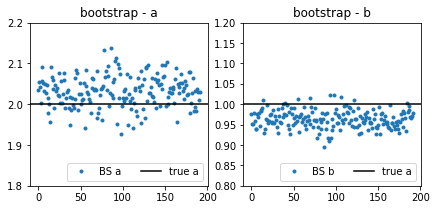

In [18]:
# plot results

fig, ax = plt.subplots(1,2,figsize=(7,3))

ax[0].plot(slope,'.',label='BS a')
ax[0].set_title('bootstrap - a')
ax[0].set_ylim(1.8,2.2)
ax[0].axhline(2,c='black',label='true a')
ax[0].legend(ncol=2,loc='lower right')

ax[1].plot(inter,'.',label='BS b')
ax[1].set_title('bootstrap - b')
ax[1].set_ylim(0.8,1.2)
ax[1].axhline(1,c='black',label='true a')
ax[1].legend(ncol=2,loc='lower right')

Mean solution with bootstrap: 
a =  2.0322 +- 0.0384 
b =  0.9639 +- 0.0222


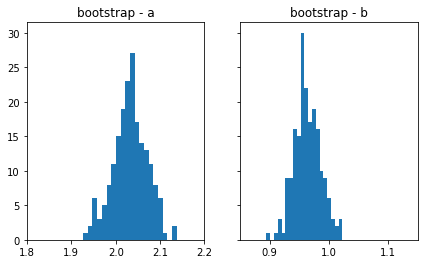

In [19]:
fig,ax = plt.subplots(1,2,figsize=(7,4),sharey=True)

x = np. arange(0.5,2.5,0.005)

ax[0].hist(slope,20)
ax[0].set_xlim(1.8,2.2)
ax[0].set_title('bootstrap - a')

ax[1].hist(inter,20)
ax[1].set_xlim(0.85,1.15)
ax[1].set_title('bootstrap - b')

print('Mean solution with bootstrap:',
      '\na = ',str(np.mean(slope))[:6]+' +- '+str(np.std(slope))[:6],
      '\nb = ',str(np.mean(inter))[:6]+' +- '+str(np.std(inter))[:6])

The results of the bootstrap method for the two parameters seem to follow a gaussian distribution. That is also compatible with the random nature of the bootstrap sampling.

# Comparison

Text(0.5, 1.0, 'Results of linear regression with 4 different methods')

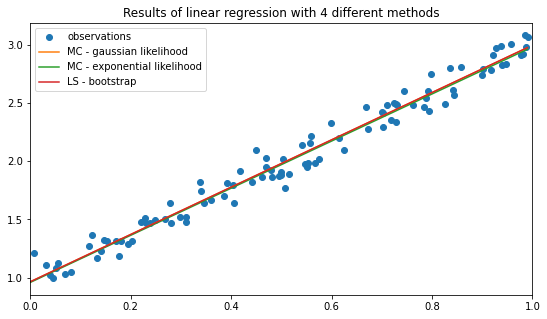

In [20]:
plt.figure(figsize=(9,5))
xx = np.arange(0,1,0.01)
plt.xlim(0,1)
plt.plot(my_problemLR.Xi,my_problemLR.Yi,'o',label='observations')
plt.plot(xx,xx*np.mean(ga)+np.mean(gb),'-',label='MC - gaussian likelihood')
plt.plot(xx,xx*np.mean(ea)+np.mean(eb),'-',label='MC - exponential likelihood')
plt.plot(xx,xx*np.mean(slope)+np.mean(inter),'-',label='LS - bootstrap')
plt.legend()
plt.title('Results of linear regression with 4 different methods')

The linear regression lines from the different methods are coherent with observations but are all overposed. Therefore I zoom on the graph:

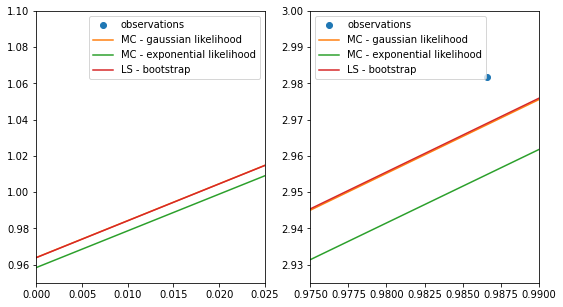

In [21]:
fig,ax = plt.subplots(1,2,figsize=(9,5))
xx = np.arange(0,1,0.01)

plt.sca(ax[0])
plt.xlim(0,0.025)
plt.ylim(0.95,1.1)
plt.plot(my_problemLR.Xi,my_problemLR.Yi,'o',label='observations')
plt.plot(xx,xx*np.mean(ga)+np.mean(gb),'-',label='MC - gaussian likelihood')
plt.plot(xx,xx*np.mean(ea)+np.mean(eb),'-',label='MC - exponential likelihood')
plt.plot(xx,xx*np.mean(slope)+np.mean(inter),'-',label='LS - bootstrap')
plt.legend()

plt.sca(ax[1])
plt.xlim(0.975,0.99)
plt.ylim(2.925,3)
plt.plot(my_problemLR.Xi,my_problemLR.Yi,'o',label='observations')
plt.plot(xx,xx*np.mean(ga)+np.mean(gb),'-',label='MC - gaussian likelihood')
plt.plot(xx,xx*np.mean(ea)+np.mean(eb),'-',label='MC - exponential likelihood')
plt.plot(xx,xx*np.mean(slope)+np.mean(inter),'-',label='LS - bootstrap')
plt.legend()

The regression lines are all close within them. The closest ones are the ones computes with MCMC and gaussian likelihood and with bootstrap and least square method. The following boxplots compare directly the results and their distributions:

In [22]:
# compute cost function for different methods

def regrcost(x,y,a,b):
    cost = np.sqrt(np.sum((y-a*x-b)**2))
    return cost

sumgcost = regrcost(my_problemLR.Xi,my_problemLR.Yi,gmMAP[0],gmMAP[1])
sumecost = regrcost(my_problemLR.Xi,my_problemLR.Yi,emMAP[0],emMAP[1])
sumbcost = regrcost(my_problemLR.Xi,my_problemLR.Yi,np.mean(slope),np.mean(inter))

C:\Users\Sara\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator


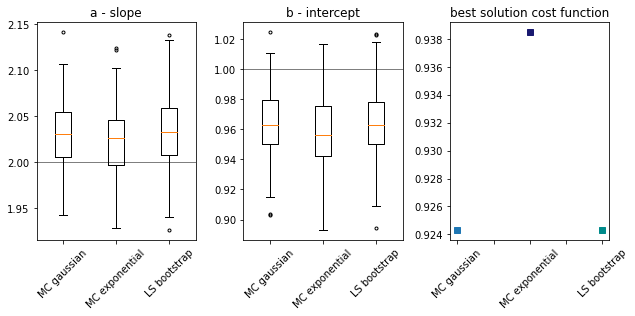

In [33]:
# plot results

from matplotlib.patches import Polygon

fig, ax = plt.subplots(1,3,figsize=(9,4.5))

ax[0].axhline(2,c='black',lw=0.5)
ax[0].boxplot([ga,ea,slope],sym='.')
ax[0].set_xticklabels(['MC gaussian','MC exponential','LS bootstrap'],rotation=45)
ax[0].set_title('a - slope')

ax[1].axhline(1,c='black',lw=0.5)
ax[1].boxplot([gb,eb,inter],sym='.')
ax[1].set_title('b - intercept')
ax[1].set_xticklabels(['MC gaussian','MC exponential','LS bootstrap'],rotation=45)

ax[2].plot(0,sumgcost,'s')
ax[2].plot(1,sumecost,'s',color='midnightblue')
ax[2].plot(2,sumbcost,'s',color='darkcyan')
ax[2].set_title('best solution cost function')
ax[2].set_xticklabels(['','MC gaussian','','MC exponential','','LS bootstrap'],rotation=45)

fig.tight_layout()

The MCMC performed with exponential likelihood has the highest cost function and its solution is the the furthest from the others. This kind of probability may not be suitable to represent the statistics of the data likelihood. The other two methods have similar results, with a slope slightly higher than 2 and a slope slightly lower than one. The average slope and intercept computed with MC gaussian likelihood and LS bootstrap is:


<div align="center"> a = 2.0018 +- 0.0239
<div align="center"> b = 0.9824 +- 0.0188
    
Both the average slope a and the average intercept b are included in included in an interval of $\pm 1\sigma$ around their true values (a=2, b=1). Still, it is particularly evident that, in the case of the intercept, the average results are lower (~0.98) than the true value and, in the case of the slope, are higher. That doesn't mean that the results are wrong, as the 'observations' were generated with a random number generator that uses a uniform distribution between 0 and 1. It is therefore normal that the 'observations' are not normally distributed around the true values, as it would happen with true observations.